In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
strImg = "p.jpg"
img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE) #Convertimos a escala grises al leer
img.shape

(804, 1280)

<function matplotlib.pyplot.show(close=None, block=None)>

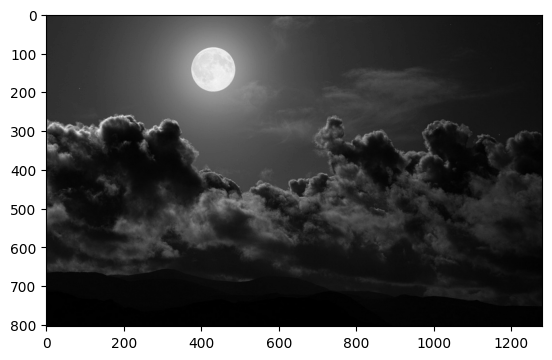

In [24]:
plt.imshow(img, cmap="gray")
plt.show

#### Histograma de la imagen original

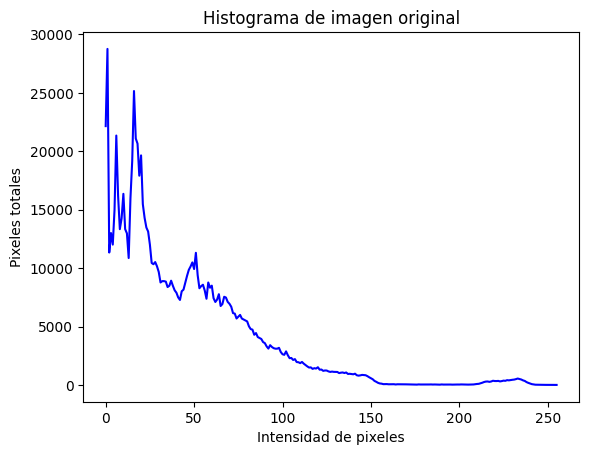

In [25]:
hist1 = cv2.calcHist([img], [0], None,[256], [0,256])
len(hist1)
plt.plot(hist1, color= "blue")
plt.xlabel("Intensidad de pixeles")
plt.ylabel("Pixeles totales")
plt.title("Histograma de imagen original")
plt.show()

Se obtienen las frecuencias

In [26]:
frecuencias = list(hist1.reshape(1,-1)[0])

Se extraen el alto y ancho

In [27]:
alto= img.shape[0]
ancho= img.shape[1]

Se obtiene la densidad

In [28]:
densidad = np.true_divide(frecuencias, (alto*ancho))

##### Función de distribución acumulada

In [29]:
cdfDensidad = np.cumsum(densidad, dtype=float)

Se crea un lienzo donde dejar la gráfica ecualizada

In [30]:
ecualizada = np.zeros_like(img)

### Ecualización

In [31]:
for i in range(0,alto):
    for j in range (0, ancho):
        pixel = img[i, j]
        newPixel = 255*cdfDensidad[pixel]
        ecualizada[i,j] = newPixel

In [32]:
cv2.imwrite("ecualizada2.jpg", ecualizada)

True

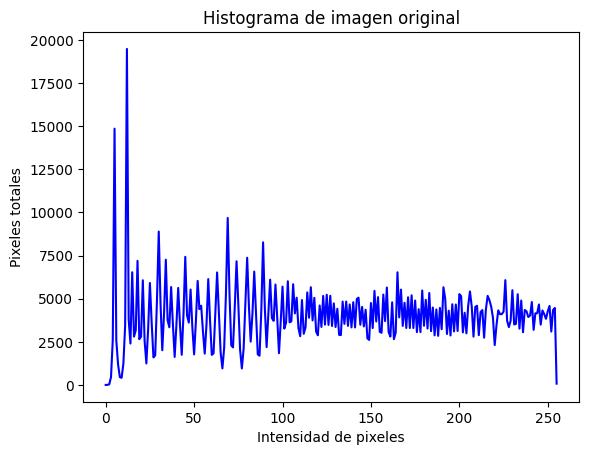

In [33]:
strImg = "ecualizada2.jpg"
img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE) #Convertimos a escala grises al leer
imgecu = cv2.calcHist([img], [0], None,[256], [0,256])
len(imgecu)
plt.plot(imgecu, color= "blue")
plt.xlabel("Intensidad de pixeles")
plt.ylabel("Pixeles totales")
plt.title("Histograma de imagen original")
plt.show()